In [1]:
from selenium import webdriver as wb
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from tqdm import tqdm
import time

In [2]:
#f-string : 문자열 앞에 f를 붙이고, 문자열 내부의 중괄호 안에 변수 표현식을 직접 넣어 사용할 수 있는문자열 포매팅 방식 

keyword = '"겨울러닝" -수수료 -파트너스 -원고료 -업체 -제공 -쇼핑커넥트 -필라테스'
start_date = '20210901'
end_date='20250901'
blog_search_url = f'https://search.naver.com/search.naver?ssc=tab.blog.all&query={keyword}&sm=tab_opt&nso=so%3Ar%2Cp%3Afrom{start_date}to{end_date}'

In [3]:
driver = wb.Chrome()
driver.get(blog_search_url)
driver.maximize_window()

In [4]:
import time

for i in tqdm(range(100)):
    body = driver.find_element(By.TAG_NAME, 'body')
    body.send_keys(Keys.END)
    time.sleep(1.5)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [02:38<00:00,  1.58s/it]


In [5]:
blog_titles = driver.find_elements(By.CLASS_NAME, 'title_link')
blog_titles

#2. href를 href_list에 append하기
href_list = []

for i in blog_titles:
    href = i.get_attribute("href")
    href_list.append(href)

href_list

['https://blog.naver.com/carry_on_me/223695411085',
 'https://blog.naver.com/z2inny/223749538504',
 'https://blog.naver.com/bonjour_jane_/223739436048',
 'https://blog.naver.com/uhmstory/223668808318',
 'https://blog.naver.com/kaeback2/223735601466',
 'https://blog.naver.com/tel0/223745285709',
 'https://blog.naver.com/kazet20000/223677904662',
 'https://blog.naver.com/1429son/223692852890',
 'https://blog.naver.com/minpower1210/223699538108',
 'https://blog.naver.com/doit_right_now/223692964282',
 'https://blog.naver.com/alice_nature/223765143808',
 'https://blog.naver.com/jisl1102/223722034595',
 'https://blog.naver.com/420yskkk/223733367212',
 'https://blog.naver.com/wooltraveler/223743136578',
 'https://blog.naver.com/z2inny/223725610904',
 'https://blog.naver.com/hhyejjin0810/223687623228',
 'https://blog.naver.com/uhmstory/223729832588',
 'https://blog.naver.com/yihy131/223673041949',
 'https://blog.naver.com/kaeback2/223678527687',
 'https://blog.naver.com/realpsg/223708369165',

In [6]:
len(href_list)

1020

In [7]:
driver.get(href_list[0])

In [8]:
driver.switch_to.frame('mainFrame')

In [10]:
title = driver.find_element(By.CLASS_NAME, 'se-fs- se-ff-')
title.text

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".se-fs- se-ff-"}
  (Session info: chrome=140.0.7339.128); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
	GetHandleVerifier [0x0x7ff76c54fc95+79861]
	GetHandleVerifier [0x0x7ff76c54fcf0+79952]
	(No symbol) [0x0x7ff76c2ccada]
	(No symbol) [0x0x7ff76c324457]
	(No symbol) [0x0x7ff76c32471c]
	(No symbol) [0x0x7ff76c378217]
	(No symbol) [0x0x7ff76c34cb1f]
	(No symbol) [0x0x7ff76c374f8b]
	(No symbol) [0x0x7ff76c34c8b3]
	(No symbol) [0x0x7ff76c315272]
	(No symbol) [0x0x7ff76c316043]
	GetHandleVerifier [0x0x7ff76c80b9cd+2946349]
	GetHandleVerifier [0x0x7ff76c805c4a+2922410]
	GetHandleVerifier [0x0x7ff76c8259d7+3052855]
	GetHandleVerifier [0x0x7ff76c56aa7e+189918]
	GetHandleVerifier [0x0x7ff76c572a1f+222591]
	GetHandleVerifier [0x0x7ff76c558ab4+116244]
	GetHandleVerifier [0x0x7ff76c558c69+116681]
	GetHandleVerifier [0x0x7ff76c53f048+11176]
	BaseThreadInitThunk [0x0x7ffd2f3fe8d7+23]
	RtlUserThreadStart [0x0x7ffd2ff68d9c+44]


In [11]:
content = driver.find_element(By.CLASS_NAME,'se-main-container')
content.text

''

In [12]:
date = driver.find_element(By.CSS_SELECTOR,'.se_publishDate.pcol2')
date.text

''

In [13]:
from tqdm import tqdm
import time

In [14]:
# 수집한 데이터를 담을 리스트
df = []
# 실패한 URL과 오류 사유를 저장할 빈 리스트
failed_url = []  

# 브라우저 실행하기
driver = wb.Chrome()

# href_list 순회하며 데이터 수집하기
for href in tqdm(href_list):
    try:
        # 1) 페이지 요청하기
        driver.get(href)
        # 페이지 로딩 대기

        # 2) iframe으로 전환하기
        driver.switch_to.frame('mainFrame')

        # 3) 제목 추출하기
        title = driver.find_element(By.CLASS_NAME, 'se-fs-.se-ff-').text
	
        # 4) 내용 추출하기
        content = driver.find_element(By.CLASS_NAME, 'se-main-container').text

        # 5) 날짜 추출하기
        date = driver.find_element(By.CSS_SELECTOR,'.se_publishDate.pcol2').text

        # 6) df 리스트에 제목, 내용, 날짜, URL 추가하기
        df.append([title, content, date, href])

    except Exception as e:
        # 오류 발생 시 failed_url에 href와 에러 사유 추가하기
        failed_url.append([href, str(e)])

# 7) 드라이버 종료하기
driver.quit()

# 결과 확인
df, failed_url

100%|██████████| 1020/1020 [46:17<00:00,  2.72s/it] 


([['여자 겨울 러닝 마라톤 복장',
   '여자 겨울 러닝 마라톤 복장\n어떻게 입어야 할까?\n어으 추워\n요즘 너무 춥지 않나요~\n퇴근 후 러닝하시는 분들\n그리고 출근 전 러닝하시는 분들\n너무 존경스럽습니다\n춥다고 실내 러닝머신으로 달리다가\n밖에 나가고싶어져서\n따뜻하게 입고 나가야겠다하고\n옷장을 열어보았습니다\n겨울에 야외 달리 할 때 복장\n제가 따뜻하게 입고 나가는\n달리기 운동복장 보여드리면서\n어떻게 입는게 좋은지\n알려드려보겠습니다 ~!\n블랙 러버 착장\n이너티셔츠\n겨울러닝복장\n제 옷장 80% 이상이\n블랙 컬러 옷이라는 사실\ntmi 알려드리면서 시작합니다\n우선 이너티는 반 팔을 입기도하고\n긴 팔을 입기도 하는데요\n얇고 통기성 좋은 걸로 입어줍니다\n겨울이라도 땀나는데 안에서 부터\n땀을 흡수하고 방출하지 못하면\n답답하더라고요\n여자 겨울 러닝 복장\n필수템 스포츠브라탑\n저에게 사연이 참 많은 스포츠브라탑\n오랜 시간동안 수 많은 브라탑을 거쳐서\n정착한 눈물나게 고마운 필미업 스포츠브라입니다\n지퍼라 입고벗기도 쉽고\n통기성도 좋고 패드도 일체형이고\n저는 이제 이거 없이 운동못합니다\n살 닿는 부분 다 편하고\n부드러워서 정말 잘 입고 있고요\n러닝 할 때는 무조건 필미업입니다\n이거 입어주고 이너티 입어주었어요 ~\n러닝하고 땀 났는데\n지퍼 없는거 벗다가 고생한 적 있지 않으세요?\n저만 그랬나요 흡.........\n저는 너무 고생을 해서\n이제는 지퍼 아니면 못입습니다\n앞지퍼는 사랑이에요.....\n러닝복 하의 팬츠\n레깅스를 입기도 하는데\n너무 추운날씨에는\n두툼한 기모 팬츠나\n두툼한 트레이닝 바지를 입어줍니다\n왼쪽 블랙 컬러 팬츠는 기모가 없고\n오른쪽은 양털기모가 있는 바지에요\n아무래도 찬바람 쌩쌩 부니까\n얇은 레깅스로는 도저히 추워서\n안되겠더라고요\n바람을 막아주는 팬츠를 추천합니다\n아니면 기모 타이즈도 좋아요\n쫙쫙 늘어나는 걸 좋아해서\n유독 한 타이즈만 주구장창입는데\n판매처가 

In [15]:
for url, error in failed_url:
    print(f"URL: {url}")
    print(f"Error: {error}\n")

URL: https://blog.naver.com/tel0/223745285709
Error: Message: no such element: Unable to locate element: {"method":"css selector","selector":".se-fs-.se-ff-"}
  (Session info: chrome=140.0.7339.128); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#nosuchelementexception
Stacktrace:
	GetHandleVerifier [0x0x7ff76c54fc95+79861]
	GetHandleVerifier [0x0x7ff76c54fcf0+79952]
	(No symbol) [0x0x7ff76c2ccada]
	(No symbol) [0x0x7ff76c324457]
	(No symbol) [0x0x7ff76c32471c]
	(No symbol) [0x0x7ff76c378217]
	(No symbol) [0x0x7ff76c34cb1f]
	(No symbol) [0x0x7ff76c374f8b]
	(No symbol) [0x0x7ff76c34c8b3]
	(No symbol) [0x0x7ff76c315272]
	(No symbol) [0x0x7ff76c316043]
	GetHandleVerifier [0x0x7ff76c80b9cd+2946349]
	GetHandleVerifier [0x0x7ff76c805c4a+2922410]
	GetHandleVerifier [0x0x7ff76c8259d7+3052855]
	GetHandleVerifier [0x0x7ff76c56aa7e+189918]
	GetHandleVerifier [0x0x7ff76c572a1f+222591]
	GetHandleVerifier [0x0x7ff76c558ab4+11624

In [16]:
import pandas as pd

blog_df = pd.DataFrame(df, columns=['제목','내용','날짜','주소'])
len(blog_df)

822

In [17]:
#. str.replace()
blog_df['내용'] = blog_df['내용'].str.replace('\n','')
blog_df

제목  \
0                        여자 겨울 러닝 마라톤 복장   
1             저강도 러닝(워밍업, 조깅) - 코로만 호흡하기   
2                     파주스타디움 비닐하우스 트랙 러닝   
3    혹시 러너 분들 중 더 꿀템 있으면 저 좀 소개시켜주십쇼!!!!   
4                               겨울 러닝 성지   
..                                   ...   
817          [공지] pt-준쌤께서 알려드리는 겨울 러닝 방법   
818                                  신갈천   
819                                        
820                 [러닝] 첫 겨울 러닝(숨차다 숨차)   
821                         출처 : 유튜브 줄코치   

                                                    내용                   날짜  \
0    여자 겨울 러닝 마라톤 복장어떻게 입어야 할까?어으 추워요즘 너무 춥지 않나요~퇴근...  2024. 12. 16. 17:01   
1    겨울철 러닝을 할 때 가장 먼저 느끼는 불편함은 바로 숨쉬기 어려움이다. 공기가 차...    2025. 2. 6. 10:34   
2    추운 겨울에도 러닝하기 좋은 파주스타디움비닐하우스 트랙이라 강추위에도 끄덕없다 소문...   2025. 1. 26. 21:26   
3    사실 저도 올해 봄부터 시작한 새싹러너인데요..이왕 최애 운동이 된 김에~겨울에도 ...   2024. 11. 22. 7:30   
4    겨울 러닝 성지파주 스타디움운영시간은 저녁 9시 정도로 생각하시면 됩니다.9:30분...   2025. 1. 23. 11:22   
..                                                 ...                  ...   
817  안녕하세요.이번에도 좋은 소식으로돌아온 스톤앤짐 준쌤이예요.오늘은 어제보다 더 추운...    2025. 1. 7. 17:38   
818  신갈천300m© NAVER Corp.신갈천자전거도로경기도 용인시 기흥구 신갈동신갈천...    2025. 1. 11. 6:00   
819  작고 소중한 내 첫 런데이첨 뛸 때 첫 발이 그렇게 안 떨어지더랍니다낸들 뛰어본 적...    2023. 2. 18. 7:46   
820  21km 러닝 이후에 왼쪽 두번째 발가락에피멍이 들면서 일명 조깅발톱이라는 부상을 ...   2022. 12. 4. 17:30   
821  안녕하세요, 토브진입니다.날씨가 너무 추워졌죠!날씨의 영향으로 매일 뛰는 건 힘들더...  2024. 11. 30. 19:56   

                                                    주소  
0      https://blog.naver.com/carry_on_me/223695411085  
1           https://blog.naver.com/z2inny/223749538504  
2    https://blog.naver.com/bonjour_jane_/223739436048  
3         https://blog.naver.com/uhmstory/223668808318  
4         https://blog.naver.com/kaeback2/223735601466  
..                                                 ...  
817   https://blog.naver.com/rlawnsrl1994/223717608628  
818      https://blog.naver.com/251______/223721986793  
819      https://blog.naver.com/bakaronii/223019673773  
820          https://blog.naver.com/sozku/222945789990  
821        https://blog.naver.com/pilason/223678172490  

[822 rows x 4 columns]

In [18]:

blog_df['날짜'] = blog_df['날짜'].str[:-6]
blog_df

제목  \
0                        여자 겨울 러닝 마라톤 복장   
1             저강도 러닝(워밍업, 조깅) - 코로만 호흡하기   
2                     파주스타디움 비닐하우스 트랙 러닝   
3    혹시 러너 분들 중 더 꿀템 있으면 저 좀 소개시켜주십쇼!!!!   
4                               겨울 러닝 성지   
..                                   ...   
817          [공지] pt-준쌤께서 알려드리는 겨울 러닝 방법   
818                                  신갈천   
819                                        
820                 [러닝] 첫 겨울 러닝(숨차다 숨차)   
821                         출처 : 유튜브 줄코치   

                                                    내용             날짜  \
0    여자 겨울 러닝 마라톤 복장어떻게 입어야 할까?어으 추워요즘 너무 춥지 않나요~퇴근...  2024. 12. 16.   
1    겨울철 러닝을 할 때 가장 먼저 느끼는 불편함은 바로 숨쉬기 어려움이다. 공기가 차...    2025. 2. 6.   
2    추운 겨울에도 러닝하기 좋은 파주스타디움비닐하우스 트랙이라 강추위에도 끄덕없다 소문...   2025. 1. 26.   
3    사실 저도 올해 봄부터 시작한 새싹러너인데요..이왕 최애 운동이 된 김에~겨울에도 ...   2024. 11. 22   
4    겨울 러닝 성지파주 스타디움운영시간은 저녁 9시 정도로 생각하시면 됩니다.9:30분...   2025. 1. 23.   
..                                                 ...            ...   
817  안녕하세요.이번에도 좋은 소식으로돌아온 스톤앤짐 준쌤이예요.오늘은 어제보다 더 추운...    2025. 1. 7.   
818  신갈천300m© NAVER Corp.신갈천자전거도로경기도 용인시 기흥구 신갈동신갈천...    2025. 1. 11   
819  작고 소중한 내 첫 런데이첨 뛸 때 첫 발이 그렇게 안 떨어지더랍니다낸들 뛰어본 적...    2023. 2. 18   
820  21km 러닝 이후에 왼쪽 두번째 발가락에피멍이 들면서 일명 조깅발톱이라는 부상을 ...   2022. 12. 4.   
821  안녕하세요, 토브진입니다.날씨가 너무 추워졌죠!날씨의 영향으로 매일 뛰는 건 힘들더...  2024. 11. 30.   

                                                    주소  
0      https://blog.naver.com/carry_on_me/223695411085  
1           https://blog.naver.com/z2inny/223749538504  
2    https://blog.naver.com/bonjour_jane_/223739436048  
3         https://blog.naver.com/uhmstory/223668808318  
4         https://blog.naver.com/kaeback2/223735601466  
..                                                 ...  
817   https://blog.naver.com/rlawnsrl1994/223717608628  
818      https://blog.naver.com/251______/223721986793  
819      https://blog.naver.com/bakaronii/223019673773  
820          https://blog.naver.com/sozku/222945789990  
821        https://blog.naver.com/pilason/223678172490  

[822 rows x 4 columns]

In [19]:
from konlpy.tag import Okt

In [20]:
okt = Okt()

def extract_nouns(text):
    #1) tag 값이 'noun'이고 len(word)>=2 것들만 반환하기
    # nouns 리스트에 append(조건을 만족하면)
    nouns=[]
    #pos로 결과 값을 받아보면 : (단어, 품사)
    for word, tag in okt.pos(text):
        if tag == "Noun" and len(word) >=2:
            nouns.append(word)
    return nouns

In [21]:
blog_df["nouns"] = blog_df["내용"].apply(extract_nouns)
blog_df

제목  \
0                        여자 겨울 러닝 마라톤 복장   
1             저강도 러닝(워밍업, 조깅) - 코로만 호흡하기   
2                     파주스타디움 비닐하우스 트랙 러닝   
3    혹시 러너 분들 중 더 꿀템 있으면 저 좀 소개시켜주십쇼!!!!   
4                               겨울 러닝 성지   
..                                   ...   
817          [공지] pt-준쌤께서 알려드리는 겨울 러닝 방법   
818                                  신갈천   
819                                        
820                 [러닝] 첫 겨울 러닝(숨차다 숨차)   
821                         출처 : 유튜브 줄코치   

                                                    내용             날짜  \
0    여자 겨울 러닝 마라톤 복장어떻게 입어야 할까?어으 추워요즘 너무 춥지 않나요~퇴근...  2024. 12. 16.   
1    겨울철 러닝을 할 때 가장 먼저 느끼는 불편함은 바로 숨쉬기 어려움이다. 공기가 차...    2025. 2. 6.   
2    추운 겨울에도 러닝하기 좋은 파주스타디움비닐하우스 트랙이라 강추위에도 끄덕없다 소문...   2025. 1. 26.   
3    사실 저도 올해 봄부터 시작한 새싹러너인데요..이왕 최애 운동이 된 김에~겨울에도 ...   2024. 11. 22   
4    겨울 러닝 성지파주 스타디움운영시간은 저녁 9시 정도로 생각하시면 됩니다.9:30분...   2025. 1. 23.   
..                                                 ...            ...   
817  안녕하세요.이번에도 좋은 소식으로돌아온 스톤앤짐 준쌤이예요.오늘은 어제보다 더 추운...    2025. 1. 7.   
818  신갈천300m© NAVER Corp.신갈천자전거도로경기도 용인시 기흥구 신갈동신갈천...    2025. 1. 11   
819  작고 소중한 내 첫 런데이첨 뛸 때 첫 발이 그렇게 안 떨어지더랍니다낸들 뛰어본 적...    2023. 2. 18   
820  21km 러닝 이후에 왼쪽 두번째 발가락에피멍이 들면서 일명 조깅발톱이라는 부상을 ...   2022. 12. 4.   
821  안녕하세요, 토브진입니다.날씨가 너무 추워졌죠!날씨의 영향으로 매일 뛰는 건 힘들더...  2024. 11. 30.   

                                                    주소  \
0      https://blog.naver.com/carry_on_me/223695411085   
1           https://blog.naver.com/z2inny/223749538504   
2    https://blog.naver.com/bonjour_jane_/223739436048   
3         https://blog.naver.com/uhmstory/223668808318   
4         https://blog.naver.com/kaeback2/223735601466   
..                                                 ...   
817   https://blog.naver.com/rlawnsrl1994/223717608628   
818      https://blog.naver.com/251______/223721986793   
819      https://blog.naver.com/bakaronii/223019673773   
820          https://blog.naver.com/sozku/222945789990   
821        https://blog.naver.com/pilason/223678172490   

                                                 nouns  
0    [여자, 겨울, 러닝, 마라톤, 복장, 어으, 요즘, 퇴근, 러닝, 출근, 러닝, ...  
1    [겨울철, 러닝, 가장, 먼저, 바로, 숨쉬기, 어려움, 공기, 평소, 기침, 나기...  
2    [겨울, 러닝, 파주, 스타디움, 비닐하우스, 트랙, 추위, 끄덕, 최근, 날씨, ...  
3    [사실, 올해, 시작, 새싹, 러너, 최애, 운동, 겨울, 준비, 이번, 포스팅, ...  
4    [겨울, 러닝, 성지, 파주, 스타디움, 운영, 시간, 저녁, 정도, 생각, 표시,...  
..                                                 ...  
817  [이번, 소식, 스톤, 앤짐, 준쌤, 오늘, 어제, 날씨, 겨울철, 혈관, 수축, ...  
818  [자전거, 도로, 경기도, 용인시, 기흥구, 신갈동, 자전거, 도로, 경기도, 용인...  
819  [작고, 런데, 이첨, 처음, 데이, 나이스, 걷기, 플랜, 입문, 최근, 성우, ...  
820  [러닝, 이후, 왼쪽, 두번째, 발가락, 에피, 일명, 조깅, 발톱, 부상, 정도,...  
821  [토브, 진입, 날씨, 날씨, 영향, 매일, 하프, 코스, 준비, 보강, 운동, 고...  

[822 rows x 5 columns]

In [22]:
#3. 단어별 빈도 계산하기 (Counter)
from collections import Counter

all_nouns = []

#df["nouns"]
for nouns in blog_df["nouns"]:
    all_nouns.extend(nouns)

In [23]:
freq_dict = Counter(all_nouns)

In [24]:
top20 = freq_dict.most_common(20)
top20

[('러닝', 9404),
 ('겨울', 5022),
 ('장갑', 1986),
 ('운동', 1766),
 ('달리기', 1281),
 ('착용', 1094),
 ('날씨', 1064),
 ('제품', 1048),
 ('복장', 1042),
 ('추천', 922),
 ('생각', 909),
 ('나이키', 857),
 ('정도', 837),
 ('바람', 775),
 ('오늘', 764),
 ('때문', 755),
 ('보온', 726),
 ('기능', 719),
 ('시작', 695),
 ('겨울철', 692)]

In [25]:
#볼 용어 처리하기 : '음식물', '처리기'
stopwords= ["러닝", "런닝 ","러닝 " "로부터","협찬","제공","커뮤니티", "달리기", "운동","육아","겨울"]

#새로운 필터링돤 리스트 생성을 위한 빈 리스트
filtered_nouns = []

for nouns in all_nouns:
    if nouns not in stopwords:
        filtered_nouns.append(nouns)

filtered_freq_dict = Counter(filtered_nouns)

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [27]:
wc = WordCloud(
    font_path = 'C:/Windows/Fonts/malgunbd.ttf',
    background_color = 'white',
    width=800,
    height=600
).generate_from_frequencies(filtered_freq_dict)

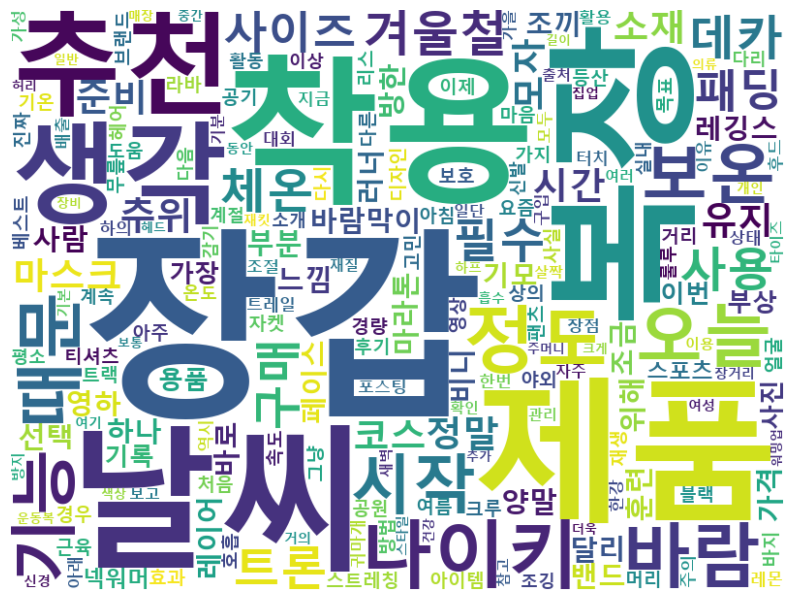

In [28]:
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()